# $\LARGE Artificial \ Neural \ Network$ 

# Act 1 - Read Data
#### Import the usual 4  packages!

Let's start by importing the important packages!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow

In [3]:
# Creating all models
from sklearn.model_selection import train_test_split

# KNN and ANN
from sklearn.preprocessing import StandardScaler

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Test all models
from sklearn.metrics import classification_report, confusion_matrix

Read your data

In [4]:
cat=pd.read_csv('../Data/Star_Formation/HiGAL_clump_catalogue_correct_formatting.csv')

check head, and describe

In [3]:
cat.head()

,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.0,0.0,0.0,...,1.0,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.0,0.0,0.0,...,1.0,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.0,0.0,0.0,...,1.0,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.0,0.0,0.0,...,1.0,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.0,0.0,0.0,...,1.0,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341


,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.0,0.0,0.0,...,1.0,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.0,0.0,0.0,...,1.0,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.0,0.0,0.0,...,1.0,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.0,0.0,0.0,...,1.0,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.0,0.0,0.0,...,1.0,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341


In [4]:
cat.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1732.0,10666.594111,5659.007313,4454.000000,4886.750000,15760.500000,16193.250000,16626.000000
GLON,1732.0,20.681977,10.301232,9.254488,10.152985,30.025016,30.745236,31.496995
GLAT,1732.0,-0.103156,0.501320,-1.277056,-0.453265,-0.108080,0.225755,1.242487
ra,1732.0,277.147742,4.875525,270.542950,272.292923,281.041685,281.903080,283.019690
dec,1732.0,-10.894404,9.148600,-21.484523,-20.205528,-2.864130,-1.963998,-0.764793
...,...,...,...,...,...,...,...,...
LAM_0_TK,1732.0,35.739319,47.893383,0.000000,0.000000,0.000000,68.325000,285.300000
L_BOL,1732.0,2184.957927,14235.393590,-3325.660000,-6.842500,-2.090000,301.497500,270267.530000
LRATIO,1732.0,42.264983,240.913000,2.220000,6.515000,11.530000,31.475000,7107.340000
T_BOL,1732.0,28.223967,14.194161,11.930000,18.270000,22.870000,36.035000,154.830000


,count,mean,std,min,25%,50%,75%,max
ID,1732.0,10666.594111,5659.007313,4454.000000,4886.750000,15760.500000,16193.250000,16626.000000
GLON,1732.0,20.681977,10.301232,9.254488,10.152985,30.025016,30.745236,31.496995
GLAT,1732.0,-0.103156,0.501320,-1.277056,-0.453265,-0.108080,0.225755,1.242487
ra,1732.0,277.147742,4.875525,270.542950,272.292923,281.041685,281.903080,283.019690
dec,1732.0,-10.894404,9.148600,-21.484523,-20.205528,-2.864130,-1.963998,-0.764793
...,...,...,...,...,...,...,...,...
LAM_0_TK,1732.0,35.739319,47.893383,0.000000,0.000000,0.000000,68.325000,285.300000
L_BOL,1732.0,2184.957927,14235.393590,-3325.660000,-6.842500,-2.090000,301.497500,270267.530000
LRATIO,1732.0,42.264983,240.913000,2.220000,6.515000,11.530000,31.475000,7107.340000
T_BOL,1732.0,28.223967,14.194161,11.930000,18.270000,22.870000,36.035000,154.830000


In [9]:
cat.columns

Index(['ID', 'DESIGNATION', 'GLON', 'GLAT', 'ra', 'dec', 'DESIGNATION_70',
       'F70', 'DF70', 'F70_TOT', 'DF70_TOT', 'F70_ADD', 'DF70_ADD',
       'F70_ADD_TOT', 'DF70_ADD_TOT', 'ULIM_70', 'DESIGNATION_160', 'F160',
       'DF160', 'F160_ADD', 'DF160_ADD', 'ULIM_160', 'DESIGNATION_250', 'F250',
       'DF250', 'DESIGNATION_350', 'F350', 'DF350', 'FSC350', 'DFSC350',
       'DESIGNATION_500', 'F500', 'DF500', 'FSC500', 'DFSC500',
       'DESIGNATION_21', 'F21', 'DF21', 'F21_TOT', 'DF21_TOT',
       'DESIGNATION_22', 'F22', 'DF22', 'F22_TOT', 'DF22_TOT',
       'DESIGNATION_24', 'F24', 'DF24', 'F24_TOT', 'DF24_TOT',
       'DESIGNATION_870', 'F870', 'DF870', 'DESIGNATION_1100', 'F1100',
       'DF1100', 'DFWHM250', 'DIST', 'NEAR_DIST', 'FAR_DIST', 'DIST_FLAG',
       'DIAM', 'M_LARS', 'FIT_TYPE', 'EVOL_FLAG', 'MASS', 'DMASS', 'TEMP',
       'DTEMP', 'LAM_0_TK', 'L_BOL', 'LRATIO', 'T_BOL', 'SURF_DENS'],
      dtype='object')

Index(['ID', 'DESIGNATION', 'GLON', 'GLAT', 'ra', 'dec', 'DESIGNATION_70',
       'F70', 'DF70', 'F70_TOT', 'DF70_TOT', 'F70_ADD', 'DF70_ADD',
       'F70_ADD_TOT', 'DF70_ADD_TOT', 'ULIM_70', 'DESIGNATION_160', 'F160',
       'DF160', 'F160_ADD', 'DF160_ADD', 'ULIM_160', 'DESIGNATION_250', 'F250',
       'DF250', 'DESIGNATION_350', 'F350', 'DF350', 'FSC350', 'DFSC350',
       'DESIGNATION_500', 'F500', 'DF500', 'FSC500', 'DFSC500',
       'DESIGNATION_21', 'F21', 'DF21', 'F21_TOT', 'DF21_TOT',
       'DESIGNATION_22', 'F22', 'DF22', 'F22_TOT', 'DF22_TOT',
       'DESIGNATION_24', 'F24', 'DF24', 'F24_TOT', 'DF24_TOT',
       'DESIGNATION_870', 'F870', 'DF870', 'DESIGNATION_1100', 'F1100',
       'DF1100', 'DFWHM250', 'DIST', 'NEAR_DIST', 'FAR_DIST', 'DIST_FLAG',
       'DIAM', 'M_LARS', 'FIT_TYPE', 'EVOL_FLAG', 'MASS', 'DMASS', 'TEMP',
       'DTEMP', 'LAM_0_TK', 'L_BOL', 'LRATIO', 'T_BOL', 'SURF_DENS'],
      dtype='object')

# Act 2 - Data Prepration
#### 2.1 Train Test Split
- Get rid of those EVOL_FLAG == 0

In [5]:
cat1 = cat[cat['EVOL_FLAG'] != 0]
cat1

,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.000,0.000,0.000,...,1.0,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.000,0.000,0.000,...,1.0,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.000,0.000,0.000,...,1.0,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.000,0.000,0.000,...,1.0,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.000,0.000,0.000,...,1.0,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,16621,HIGALBM31.4881+0.4038,31.488148,0.403803,281.84174,-1.100717,-,0.000,0.000,0.000,...,1.0,-11.35,-2.15,13.58,0.90,0.0,-6.85,10.49,21.03,0.125
1728,16623,HIGALBM31.4908+0.4419,31.490754,0.441868,281.80905,-1.081032,HIGALPB031.4908+0.4418,0.494,0.050,0.494,...,2.0,191.49,188.77,12.76,0.21,0.0,159.25,17.09,31.68,0.180
1729,16624,HIGALBM31.4946-0.0244,31.494575,-0.024419,282.22583,-1.290333,-,0.000,0.000,0.000,...,1.0,-3.84,-1.01,15.23,1.03,0.0,-4.61,15.64,23.58,0.065
1730,16625,HIGALBM31.4962+0.1774,31.496159,0.177432,282.04688,-1.196855,HIGALPB031.4962+0.1773,17.853,0.919,17.853,...,2.0,-12.70,-0.24,16.18,0.12,105.3,-52.16,47.50,46.17,1.235


#### 2.2 Prepare X
Set your X:
- X=cat where ['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']

Set your y:

Use get_dummies to add a new column to your data! You want 0.0 for 'Flag_1' and 1.0 for 'Flag_2'
- Make sure this new column has the format of integer!
- Maybe call this new column 'Evolution_Falg_dummies'
- Hint: Use this: drop_first=True, why?
- Check this out: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

- y=cat['Evolution_Falg_dummies']

In [6]:
X = cat1[['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']]
X

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100,DFWHM250
0,0.000,0.000,4.852,3.755,1.703,0.0,0.000,0.000,0.00,0.0,34.38
1,0.000,3.454,11.413,6.738,10.814,0.0,0.000,0.000,0.00,0.0,25.14
2,0.000,0.000,9.697,6.108,2.948,0.0,0.000,0.000,0.00,0.0,33.38
3,0.000,1.229,8.061,4.141,5.217,0.0,0.000,0.000,0.00,0.0,27.42
4,0.000,0.000,30.386,10.795,5.831,0.0,0.000,0.000,0.00,0.0,40.76
...,...,...,...,...,...,...,...,...,...,...,...
1726,0.000,6.327,15.921,8.838,3.416,0.0,0.000,0.000,0.00,0.0,32.12
1728,0.494,1.732,2.816,2.499,2.009,0.0,0.000,0.003,0.15,0.0,13.16
1729,0.000,6.936,8.044,4.126,2.537,0.0,0.000,0.000,0.00,0.0,25.95
1730,17.853,27.037,38.971,21.206,10.956,0.0,1.763,1.604,0.86,0.0,10.79


,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS,Evol_Flag_Dummies
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.000,0.000,0.000,...,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073,0
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.000,0.000,0.000,...,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551,0
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.000,0.000,0.000,...,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105,0
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.000,0.000,0.000,...,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377,0
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.000,0.000,0.000,...,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,16622,HIGALBM31.4906+0.8712,31.490578,0.871197,281.42688,-0.885295,-,0.000,0.000,0.000,...,30.10,28.89,13.51,0.78,0.0,17.60,10.23,20.92,0.028,0
1728,16623,HIGALBM31.4908+0.4419,31.490754,0.441868,281.80905,-1.081032,HIGALPB031.4908+0.4418,0.494,0.050,0.494,...,191.49,188.77,12.76,0.21,0.0,159.25,17.09,31.68,0.180,0
1729,16624,HIGALBM31.4946-0.0244,31.494575,-0.024419,282.22583,-1.290333,-,0.000,0.000,0.000,...,-3.84,-1.01,15.23,1.03,0.0,-4.61,15.64,23.58,0.065,0
1730,16625,HIGALBM31.4962+0.1774,31.496159,0.177432,282.04688,-1.196855,HIGALPB031.4962+0.1773,17.853,0.919,17.853,...,-12.70,-0.24,16.18,0.12,105.3,-52.16,47.50,46.17,1.235,0


In [7]:
s = pd.Series(data=cat1['EVOL_FLAG'])
cat1['Evol_Flag_Dummies'] = pd.get_dummies(s, drop_first = True, dtype = int)

<ipython-input-7-102b4025ed67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat1['Evol_Flag_Dummies'] = pd.get_dummies(s, drop_first = True, dtype = int)


In [8]:
cat1

,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS,Evol_Flag_Dummies
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.000,0.000,0.000,...,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073,0
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.000,0.000,0.000,...,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551,0
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.000,0.000,0.000,...,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105,0
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.000,0.000,0.000,...,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377,0
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.000,0.000,0.000,...,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,16621,HIGALBM31.4881+0.4038,31.488148,0.403803,281.84174,-1.100717,-,0.000,0.000,0.000,...,-11.35,-2.15,13.58,0.90,0.0,-6.85,10.49,21.03,0.125,0
1728,16623,HIGALBM31.4908+0.4419,31.490754,0.441868,281.80905,-1.081032,HIGALPB031.4908+0.4418,0.494,0.050,0.494,...,191.49,188.77,12.76,0.21,0.0,159.25,17.09,31.68,0.180,1
1729,16624,HIGALBM31.4946-0.0244,31.494575,-0.024419,282.22583,-1.290333,-,0.000,0.000,0.000,...,-3.84,-1.01,15.23,1.03,0.0,-4.61,15.64,23.58,0.065,0
1730,16625,HIGALBM31.4962+0.1774,31.496159,0.177432,282.04688,-1.196855,HIGALPB031.4962+0.1773,17.853,0.919,17.853,...,-12.70,-0.24,16.18,0.12,105.3,-52.16,47.50,46.17,1.235,1


<ipython-input-16-4e4fe533aa97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Evolution_Falg_dummies'] = pd.get_dummies(cat['EVOL_FLAG'], drop_first=True).astype('int')


In [9]:
Y = cat1['Evol_Flag_Dummies']
X_train, X_new, y_train, y_new = train_test_split(X,Y, test_size=0.30, random_state=42)


#### 2.3 perform your train test split
However, do it twice to create train 70%, validation 15%, & test set 15%

In [10]:
X_validation, X_test, y_validation, y_test = train_test_split(X_new,y_new, test_size=0.50, random_state=42)

In [11]:
X.shape, X_train.shape, X_validation.shape, X_test.shape, 

((1640, 11), (1148, 11), (246, 11), (246, 11))

#### 2.4 Now perform the scaling on your data!

In [12]:
scal = StandardScaler()
scld_X_train = scal.fit_transform(X_train)
scld_X_validation = scal.transform(X_validation)
scld_X_test = scal.transform(X_test)
scaled_X_train = pd.DataFrame(scld_X_train, columns=X.columns)
scaled_X_validation = pd.DataFrame(scld_X_validation, columns=X.columns)
scaled_X_test = pd.DataFrame(scld_X_test, columns=X.columns)

# Act 3 - Perform the ANN

#### 3.1 Create your model 
It should contain:
- 3 hidden layers of 18-10-10
- 1 output
- Add activations apprpriately!

- **make sure to compile it with appropriate optimizer and loss!**


## Important Note:
#### For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             )

#### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              )

#### For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')
              
### You may want to change optimizer to ADAM though!

#### 3.2 Let's add more to your model! 
After each layer add 50% dropout (this should exculde the last one, why?)

In [48]:
model = Sequential()
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', )

#### 3.3 We don't want our code to overfit, so import the early stopping and add the parameters appropriately

In [14]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Fit Model with no early stopping!
#### 3.4 Fit your model
- Make sure to use epochs, verbose, and validation_data
- **Howver, for the sake of this exrsice exclude the batch_size and callbacks**
- I used epoche=1000 you may choose smaller number if you want the code to run faster!

In [44]:
model.fit(x=scld_X_train, y=y_train, 
          epochs = 600, 
          verbose=1, 
          batch_size = 31,
          validation_data=(scld_X_validation, y_validation))

Epoch 1/600
38/38 [==============================] - 2s 10ms/step - loss: 0.7181 - val_loss: 0.6798
Epoch 2/600
38/38 [==============================] - 0s 6ms/step - loss: 0.7188 - val_loss: 0.6791
Epoch 3/600
38/38 [==============================] - 0s 7ms/step - loss: 0.6917 - val_loss: 0.6767
Epoch 4/600
38/38 [==============================] - 0s 7ms/step - loss: 0.6818 - val_loss: 0.6723
Epoch 5/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6935 - val_loss: 0.6713
Epoch 6/600
38/38 [==============================] - 0s 5ms/step - loss: 0.6815 - val_loss: 0.6693
Epoch 7/600
38/38 [==============================] - 0s 7ms/step - loss: 0.6839 - val_loss: 0.6679
Epoch 8/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6811 - val_loss: 0.6666
Epoch 9/600
38/38 [==============================] - 0s 8ms/step - loss: 0.6847 - val_loss: 0.6644
Epoch 10/600
38/38 [==============================] - 0s 5ms/step - loss: 0.6734 - val_loss: 0.6614
Epoch 11

Epoch 83/600
38/38 [==============================] - 0s 6ms/step - loss: 0.5207 - val_loss: 0.4006
Epoch 84/600
38/38 [==============================] - 0s 6ms/step - loss: 0.5203 - val_loss: 0.3991
Epoch 85/600
38/38 [==============================] - 0s 8ms/step - loss: 0.5276 - val_loss: 0.3951
Epoch 86/600
38/38 [==============================] - 0s 6ms/step - loss: 0.5122 - val_loss: 0.3919
Epoch 87/600
38/38 [==============================] - 0s 7ms/step - loss: 0.5034 - val_loss: 0.3885
Epoch 88/600
38/38 [==============================] - 0s 5ms/step - loss: 0.5062 - val_loss: 0.3950
Epoch 89/600
38/38 [==============================] - 0s 6ms/step - loss: 0.5353 - val_loss: 0.3950
Epoch 90/600
38/38 [==============================] - 0s 5ms/step - loss: 0.5170 - val_loss: 0.3905
Epoch 91/600
38/38 [==============================] - 0s 5ms/step - loss: 0.5007 - val_loss: 0.3858
Epoch 92/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4944 - val_loss: 0.3793


38/38 [==============================] - 0s 12ms/step - loss: 0.4097 - val_loss: 0.2581
Epoch 246/600
38/38 [==============================] - 0s 9ms/step - loss: 0.3987 - val_loss: 0.2541
Epoch 247/600
38/38 [==============================] - 0s 12ms/step - loss: 0.4009 - val_loss: 0.2533
Epoch 248/600
38/38 [==============================] - 0s 8ms/step - loss: 0.4030 - val_loss: 0.2522
Epoch 249/600
38/38 [==============================] - 0s 12ms/step - loss: 0.3840 - val_loss: 0.2543
Epoch 250/600
38/38 [==============================] - 0s 11ms/step - loss: 0.4039 - val_loss: 0.2520
Epoch 251/600
38/38 [==============================] - 0s 8ms/step - loss: 0.3766 - val_loss: 0.2544
Epoch 252/600
38/38 [==============================] - 0s 10ms/step - loss: 0.3859 - val_loss: 0.2537
Epoch 253/600
38/38 [==============================] - 0s 8ms/step - loss: 0.3728 - val_loss: 0.2453
Epoch 254/600
38/38 [==============================] - 0s 9ms/step - loss: 0.3833 - val_loss: 0.2522

38/38 [==============================] - 0s 7ms/step - loss: 0.3033 - val_loss: 0.1669
Epoch 408/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2748 - val_loss: 0.1602
Epoch 409/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2999 - val_loss: 0.1550
Epoch 410/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2573 - val_loss: 0.1440
Epoch 411/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2869 - val_loss: 0.1438
Epoch 412/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2925 - val_loss: 0.1613
Epoch 413/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2736 - val_loss: 0.1507
Epoch 414/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2825 - val_loss: 0.1639
Epoch 415/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2722 - val_loss: 0.1542
Epoch 416/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2859 - val_loss: 0.1482
Epoc

38/38 [==============================] - 0s 5ms/step - loss: 0.2557 - val_loss: 0.1544
Epoch 570/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2520 - val_loss: 0.1393
Epoch 571/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2480 - val_loss: 0.1612
Epoch 572/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2854 - val_loss: 0.1546
Epoch 573/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2698 - val_loss: 0.1463
Epoch 574/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2534 - val_loss: 0.1354
Epoch 575/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2820 - val_loss: 0.1374
Epoch 576/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2779 - val_loss: 0.1404
Epoch 577/600
38/38 [==============================] - 0s 8ms/step - loss: 0.2685 - val_loss: 0.1440
Epoch 578/600
38/38 [==============================] - 0s 7ms/step - loss: 0.2760 - val_loss: 0.1627
Epoc

Epoch 1/1000
37/37 [==============================] - 0s 4ms/step - loss: 0.7301 - val_loss: 0.6894
Epoch 2/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.7136 - val_loss: 0.6853
Epoch 3/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6813 - val_loss: 0.6802
Epoch 4/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6999 - val_loss: 0.6762
Epoch 5/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6760 - val_loss: 0.6712
Epoch 6/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6859 - val_loss: 0.6686
Epoch 7/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6834 - val_loss: 0.6655
Epoch 8/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6682 - val_loss: 0.6641
Epoch 9/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6629 - val_loss: 0.6579
Epoch 10/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6586 - val_loss: 0.6519

37/37 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 0.3207
Epoch 163/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3967 - val_loss: 0.3268
Epoch 164/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3892 - val_loss: 0.3394
Epoch 165/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 0.3194
Epoch 166/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3796 - val_loss: 0.3214
Epoch 167/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.3229
Epoch 168/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.3186
Epoch 169/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.3323
Epoch 170/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3840 - val_loss: 0.3259
Epoch 171/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3902 - val_loss: 0.

37/37 [==============================] - 0s 727us/step - loss: 0.2337 - val_loss: 0.1866
Epoch 323/1000
37/37 [==============================] - 0s 983us/step - loss: 0.2437 - val_loss: 0.1865
Epoch 324/1000
37/37 [==============================] - 0s 883us/step - loss: 0.2268 - val_loss: 0.1921
Epoch 325/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2312 - val_loss: 0.2021
Epoch 326/1000
37/37 [==============================] - 0s 785us/step - loss: 0.2744 - val_loss: 0.1984
Epoch 327/1000
37/37 [==============================] - 0s 875us/step - loss: 0.2474 - val_loss: 0.1692
Epoch 328/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2377 - val_loss: 0.1888
Epoch 329/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2483 - val_loss: 0.1839
Epoch 330/1000
37/37 [==============================] - 0s 822us/step - loss: 0.2345 - val_loss: 0.1858
Epoch 331/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2229 - 

37/37 [==============================] - 0s 1ms/step - loss: 0.2433 - val_loss: 0.1670
Epoch 403/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2161 - val_loss: 0.1596
Epoch 404/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2190 - val_loss: 0.1788
Epoch 405/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2231 - val_loss: 0.1644
Epoch 406/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2335 - val_loss: 0.1807
Epoch 407/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2502 - val_loss: 0.1674
Epoch 408/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2354 - val_loss: 0.1811
Epoch 409/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2338 - val_loss: 0.1699
Epoch 410/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2183 - val_loss: 0.1673
Epoch 411/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2005 - val_loss: 0.

37/37 [==============================] - 0s 787us/step - loss: 0.2374 - val_loss: 0.1866
Epoch 563/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.1676
Epoch 564/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2200 - val_loss: 0.1577
Epoch 565/1000
37/37 [==============================] - 0s 992us/step - loss: 0.2298 - val_loss: 0.1747
Epoch 566/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2112 - val_loss: 0.1739
Epoch 567/1000
37/37 [==============================] - 0s 998us/step - loss: 0.2163 - val_loss: 0.1938
Epoch 568/1000
37/37 [==============================] - 0s 698us/step - loss: 0.2290 - val_loss: 0.1796
Epoch 569/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2150 - val_loss: 0.1609
Epoch 570/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2016 - val_loss: 0.1652
Epoch 571/1000
37/37 [==============================] - 0s 953us/step - loss: 0.2004 - va

Epoch 642/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.1881 - val_loss: 0.1648
Epoch 643/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2395 - val_loss: 0.1897
Epoch 644/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2459 - val_loss: 0.1564
Epoch 645/1000
37/37 [==============================] - 0s 921us/step - loss: 0.2202 - val_loss: 0.1498
Epoch 646/1000
37/37 [==============================] - 0s 650us/step - loss: 0.2326 - val_loss: 0.1695
Epoch 647/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2208 - val_loss: 0.1529
Epoch 648/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2236 - val_loss: 0.1480
Epoch 649/1000
37/37 [==============================] - 0s 649us/step - loss: 0.2415 - val_loss: 0.1633
Epoch 650/1000
37/37 [==============================] - 0s 955us/step - loss: 0.2214 - val_loss: 0.1769
Epoch 651/1000
37/37 [==============================] - 0s 826us/step - lo

Epoch 801/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2219 - val_loss: 0.1394
Epoch 802/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2640 - val_loss: 0.1926
Epoch 803/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2292 - val_loss: 0.1555
Epoch 804/1000
37/37 [==============================] - 0s 687us/step - loss: 0.2207 - val_loss: 0.1565
Epoch 805/1000
37/37 [==============================] - 0s 775us/step - loss: 0.2278 - val_loss: 0.1684
Epoch 806/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2393 - val_loss: 0.1864
Epoch 807/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2135 - val_loss: 0.1838
Epoch 808/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2244 - val_loss: 0.1565
Epoch 809/1000
37/37 [==============================] - 0s 995us/step - loss: 0.1933 - val_loss: 0.1499
Epoch 810/1000
37/37 [==============================] - 0s 896us/step - loss

37/37 [==============================] - 0s 949us/step - loss: 0.1954 - val_loss: 0.1651
Epoch 960/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.1951 - val_loss: 0.1391
Epoch 961/1000
37/37 [==============================] - 0s 684us/step - loss: 0.1994 - val_loss: 0.1640
Epoch 962/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2069 - val_loss: 0.1571
Epoch 963/1000
37/37 [==============================] - 0s 966us/step - loss: 0.2317 - val_loss: 0.1757
Epoch 964/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2267 - val_loss: 0.1406
Epoch 965/1000
37/37 [==============================] - 0s 851us/step - loss: 0.2084 - val_loss: 0.1437
Epoch 966/1000
37/37 [==============================] - 0s 968us/step - loss: 0.1819 - val_loss: 0.1360
Epoch 967/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2345 - val_loss: 0.1564
Epoch 968/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2124 - va

#### create your df_loss dataframe as well as perform the plotting on how the history of loss changes!

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,val_loss
0,0.718059,0.679798
1,0.718837,0.679083
2,0.691726,0.676655
3,0.681762,0.672290
4,0.693473,0.671273
...,...,...
595,0.278631,0.152485
596,0.299812,0.173758
597,0.314480,0.163088
598,0.298464,0.173832


,loss,val_loss
0,0.730121,0.689429
1,0.713582,0.685280
2,0.681286,0.680207
3,0.699863,0.676180
4,0.676043,0.671243
...,...,...
995,0.209353,0.160007
996,0.177216,0.136477
997,0.169566,0.137550
998,0.176221,0.138335


<AxesSubplot:>

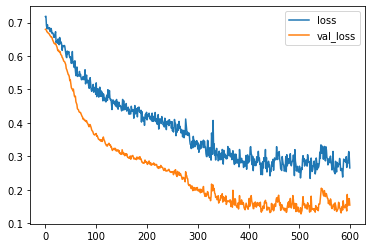

In [46]:
loss_df.plot()

<AxesSubplot:>

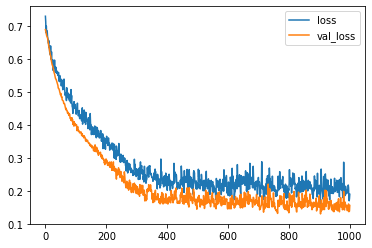

# Fit the model with the early stopping
#### 3.5 Now this time include the early stopping in
- Re-run the cell with your model defined in it and come back here again!
- Make sure to use epochs, verbose, validation_data, and callbacks 
- Plot loss vs epoch
- **Note: no need to include the batch_size your data is small enough that we don't need it.**

In [49]:
model.fit(x=scld_X_train, y=y_train, 
          epochs = 600, 
          verbose=1, 
          batch_size = 31,
          callbacks= [early_stop], 
          validation_data=(scld_X_validation, y_validation))

Epoch 1/600
38/38 [==============================] - 3s 11ms/step - loss: 0.7478 - val_loss: 0.6508
Epoch 2/600
38/38 [==============================] - 0s 6ms/step - loss: 0.7074 - val_loss: 0.6370
Epoch 3/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6747 - val_loss: 0.6255
Epoch 4/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6897 - val_loss: 0.6256
Epoch 5/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6802 - val_loss: 0.6220
Epoch 6/600
38/38 [==============================] - 0s 6ms/step - loss: 0.6675 - val_loss: 0.6104
Epoch 7/600
38/38 [==============================] - 0s 7ms/step - loss: 0.6728 - val_loss: 0.6059
Epoch 8/600
38/38 [==============================] - 0s 12ms/step - loss: 0.6928 - val_loss: 0.6041
Epoch 9/600
38/38 [==============================] - 0s 9ms/step - loss: 0.6778 - val_loss: 0.5996
Epoch 10/600
38/38 [==============================] - 0s 9ms/step - loss: 0.6559 - val_loss: 0.5968
Epoch 1

Epoch 83/600
38/38 [==============================] - 0s 5ms/step - loss: 0.5063 - val_loss: 0.4057
Epoch 84/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4840 - val_loss: 0.4026
Epoch 85/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4871 - val_loss: 0.3975
Epoch 86/600
38/38 [==============================] - 0s 6ms/step - loss: 0.4966 - val_loss: 0.3914
Epoch 87/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4730 - val_loss: 0.3891
Epoch 88/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4919 - val_loss: 0.3833
Epoch 89/600
38/38 [==============================] - 0s 6ms/step - loss: 0.5027 - val_loss: 0.3836
Epoch 90/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4782 - val_loss: 0.3805
Epoch 91/600
38/38 [==============================] - 0s 6ms/step - loss: 0.4937 - val_loss: 0.3886
Epoch 92/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4816 - val_loss: 0.3807


38/38 [==============================] - 0s 6ms/step - loss: 0.3347 - val_loss: 0.2178
Epoch 246/600
38/38 [==============================] - 0s 6ms/step - loss: 0.3368 - val_loss: 0.2308
Epoch 247/600
38/38 [==============================] - 0s 6ms/step - loss: 0.3205 - val_loss: 0.2101
Epoch 248/600
38/38 [==============================] - 0s 7ms/step - loss: 0.3002 - val_loss: 0.1925
Epoch 249/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2905 - val_loss: 0.1839
Epoch 250/600
38/38 [==============================] - 0s 5ms/step - loss: 0.2865 - val_loss: 0.1723
Epoch 251/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2910 - val_loss: 0.1713
Epoch 252/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2962 - val_loss: 0.1669
Epoch 253/600
38/38 [==============================] - 0s 7ms/step - loss: 0.3155 - val_loss: 0.1704
Epoch 254/600
38/38 [==============================] - 0s 6ms/step - loss: 0.2579 - val_loss: 0.1670
Epoc

Epoch 1/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.7127 - val_loss: 0.6797
Epoch 2/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6874 - val_loss: 0.6696
Epoch 3/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6763 - val_loss: 0.6631
Epoch 4/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6706 - val_loss: 0.6588
Epoch 5/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6727 - val_loss: 0.6548
Epoch 6/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6736 - val_loss: 0.6519
Epoch 7/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6684 - val_loss: 0.6488
Epoch 8/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6635 - val_loss: 0.6456
Epoch 9/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6585 - val_loss: 0.6398
Epoch 10/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.6516 - val_loss: 0.6337

37/37 [==============================] - 0s 1ms/step - loss: 0.4660 - val_loss: 0.4125
Epoch 83/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4438 - val_loss: 0.4044
Epoch 84/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4761 - val_loss: 0.4106
Epoch 85/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4590 - val_loss: 0.4070
Epoch 86/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.4584 - val_loss: 0.4000
Epoch 87/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4607 - val_loss: 0.4154
Epoch 88/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.4124
Epoch 89/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4596 - val_loss: 0.4085
Epoch 90/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.4054
Epoch 91/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.4433 - val_loss: 0.4069
Epoc

37/37 [==============================] - 0s 1ms/step - loss: 0.2943 - val_loss: 0.2267
Epoch 243/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2834 - val_loss: 0.2531
Epoch 244/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3011 - val_loss: 0.2497
Epoch 245/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3194 - val_loss: 0.2458
Epoch 246/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3105 - val_loss: 0.2508
Epoch 247/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2917 - val_loss: 0.2391
Epoch 248/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.3048 - val_loss: 0.2312
Epoch 249/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2903 - val_loss: 0.2269
Epoch 250/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2683 - val_loss: 0.2290
Epoch 251/1000
37/37 [==============================] - 0s 1ms/step - loss: 0.2918 - val_loss: 0.

<AxesSubplot:>

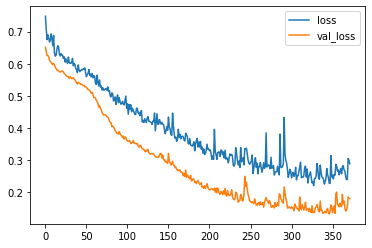

In [50]:
loss_df1 = pd.DataFrame(model.history.history)
loss_df1.plot()

<AxesSubplot:>

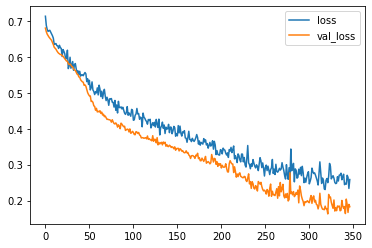

# Evaluate your model!
#### 3.6 Perfomr your evaluation on your test! Remember your test MUST be unseen data to your model!

- If you got to an error print your pred and see how it looks like! What should you do? Round the?

In [58]:
pred = np.round(model.predict(scld_X_test))


8/8 [==============================] - 0s 6ms/step


In [59]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[119   7]
 [ 12 108]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       126
           1       0.94      0.90      0.92       120

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



[[126   2]
 [ 10 108]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.98      0.92      0.95       118

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



## Act 4 Happy with the model? Save it!
#### 4.1 Save the model

In [60]:
model.save('ANN.h5')

#### 4.2 load the model

In [61]:
from tensorflow.keras.models import load_model
loaded_model = load_model('ANN.h5')

#### 4.3 for the data point below:
- Perform the scaling
- Predict the outcome

In [106]:
#Leave as it is
cols= ['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']
new_datapoint = [100*np.random.randn() for i in cols]

scale your data point and call it new_datapoint_scld

Hint: Do you have to reshape your data point?

In [127]:
new_datapoint_scld = scal.transform(np.array(new_datapoint).reshape(1,-1))

Now perform the perdiction

In [129]:
pred1 = loaded_model.predict(new_datapoint_scld)
pred1

1/1 [==============================] - 0s 59ms/step


array([[1.]], dtype=float32)

array([[1.]], dtype=float32)

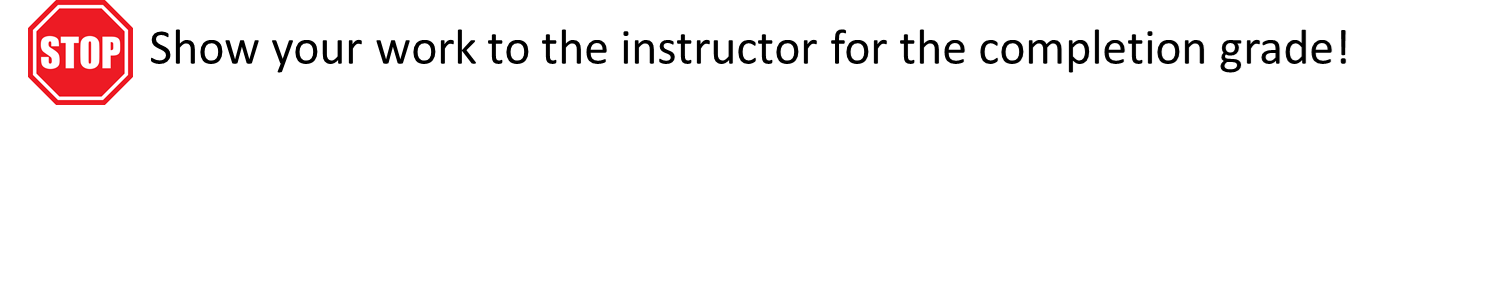